<a href="https://colab.research.google.com/github/mgxlr/Netflix-Data-Mining/blob/main/Netflix_12419276.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dataset Source

The dataset comes from Pygwalker resource page : https://docs.kanaries.net/pygwalker/resources

I also added the PICTURES of the output because I was afraid you wouldn't see them.


#Program Description

This program is designed to provide visualizations of a dataset that details various aspects of content available on Netflix. The combined visualizations give a general idea of the data and of the composition of the catalog, covering aspects such as the distribution of content types, geographical content production, content addition over time, viewer demographics, and text analysis.
I produced the following visualizations :

- Comparison of % of Movies vs TV shows Releazed on Netflix
- Showcasing the Top 10 countries to releaze Content on Netflix
- Comparison for Top 10 countries of the amount of Movie & TV Show
- Rating distribution by Film & TV Show
- Timeline of Quanitity of Movies & TV Shows added over time
- ECDF of Netflix Content Release Year (similar to 5 but different method)
- Heatmap of Target ages Proportion of Total Content by Country
- Most frequently used words in Titles

To do this, the program is made of several data processing steps on the Netflix dataset. It begins by importing necessary Python modules that provide data manipulation capabilities. The data is cleaned and dates are converted into a format more fit for analysis (from qualitative to quantitative data). The data is then read into a Pandas DataFrame, allowing for structured data analysis and manipulation.

# Flowchart

Each visualization is a step in my program's flow.

Input Required:
A CSV file named netflix_titles.csv, which contains the Netflix dataset.
Modules Used:
Pandas for data manipulation, matplotlib.pyplot and seaborn for creating visualizations, wordcloud for generating Word-Clouds from text and numpy for numerical operations.

Data Processing Used:
Loading Data: Use pandas to load the CSV file into a DataFrame.
Cleaning Data: Identify and handle missing values, extract parts of the data for visualization (release years, content types).
Aggregating Data: Use grouping and aggregation to compile the data needed (count of titles per country, distribution of ratings).

Calculation Formulas:
Percentage Calculation: Calculate the percentage of missing values or distribution of content types using the formula: (count of specific type / total count) * 100.
Aggregation: Sum and count functions for plotting.

Control and Loop Structures:
Loops to iterate through columns for the percentage of missing values. Conditional statements to check for NaN-values and content type.
Types of Data Processed and Returned:
Numerical data: Counts, percentages.
Categorical data: Content types, country names, ratings for grouping/plotting.
Textual data: Titles for Word Cloud generation.

Output:
Either graphical or data messages like printed statements (error-messages, processing completion statements, or data summary).

# Comments

Most Challenging Aspects:

- Adding counts above each bar with its corresponding value was something I had no idea how to do. I learned using online resources that it is by calculating the appropriate coordinates for the text, and then using the ‘annotate’ function of Matplotlib to place the labels directly above the bars. I still had AI do an example for me to replicate.
- The pivot table (third vizualization’s mathematical part) creation was complex due to the need to represent two dimensions of data: the country and the content type. I didn’t know how to calculate the percentages and sort the data using Pandas. I had to learn about aggregation and sorting operations. I kept validating the output at each stage to find out.
- The seventh visualization involved creating age groups and using heatmap which was tricky. I had AI explain the process to vizualize what I wanted then studied and understood. We are defining the groups, the range then using snsheatmap to showcase the data by numbers we had to define first.

Learning and Discoveries:

I really had to use everything we learned. Many modules, data cleaning, the loops, the different visualization techniques. I learned more data manipulation techniques with Pandas, Seaborn and Matplotlib, such as multi-indexing and pivot tables. I had to figure out the importance of renewing the downloaded file over time.

Best Points of the Program:

The program is turning unreadable thick data into clear, intuitive visual representations that can be easily understood by users. It’s a quite complete analysis that addresses aspects from content distribution to time trends and demographics. It is aesthetic too, with coherent colors. Moreover, the modular nature of the code allows for easy expansion or modification to incorporate additional visualizations.

In [ ]:
#@title Importing All the Modules Needed for this Program

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

In [ ]:
#@title Checking Out the First 3 rows of the Dataframe

df = pd.read_csv('netflix_titles.csv')
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [ ]:
#@title Calculating and Printing the % of Missing Values for Each Column with Any Missing Data

# Starting a loop that will go through each column in the DataFrame df
# i is a variable that takes the name of each column as the loop iterates
# .isna checks each cell in column i, returning True if the cell is NaN
# if condition is met, printing the column name with its null rate, which is rounded to two decimals
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 29.91%
cast null rate: 9.37%
country null rate: 9.44%
date_added null rate: 0.11%
rating null rate: 0.05%
duration null rate: 0.03%


In [ ]:
#@title Cleaning the Data

# Replacing blank countries with the mode (most common) country
# Keeping cast and director for data to remain consistent...
# Droping duplicates

df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data',inplace  = True)
df['director'].replace(np.nan, 'No Data',inplace  = True)
df.dropna(inplace=True)
df.drop_duplicates(inplace= True)

In [ ]:
#@title Converting date_added in Correct Format

# Converting the 'date_added' column in the DataFrame df into a datetime format
df["date_added"] = pd.to_datetime(df['date_added'])
# Extracting the month part and creating a new column named 'month_added'
df['month_added']=df['date_added'].dt.month
# Same for year
df['year_added'] = df['date_added'].dt.year

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,2021


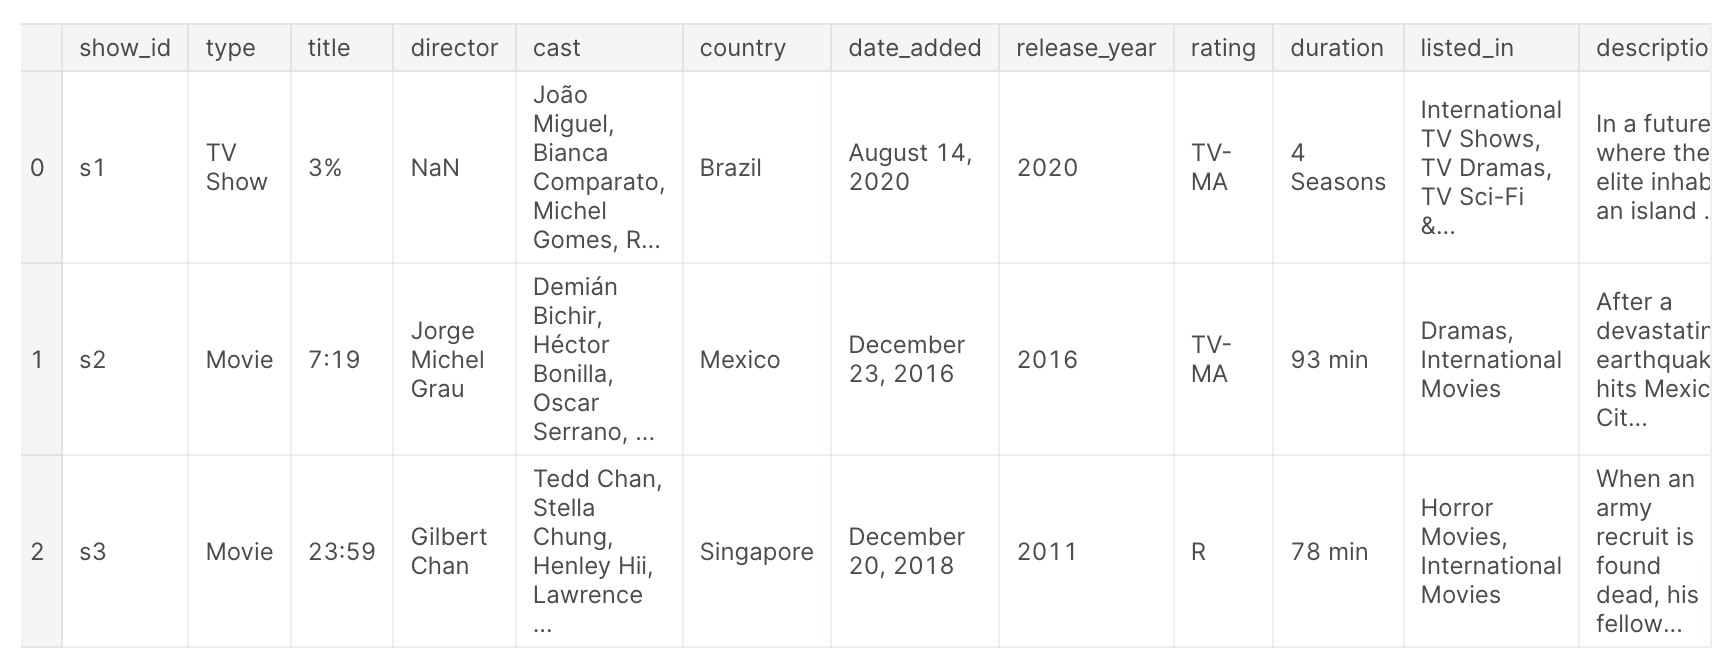

In [ ]:
#@title Info after Cleaning

print(df.to_string())
print(df.info())

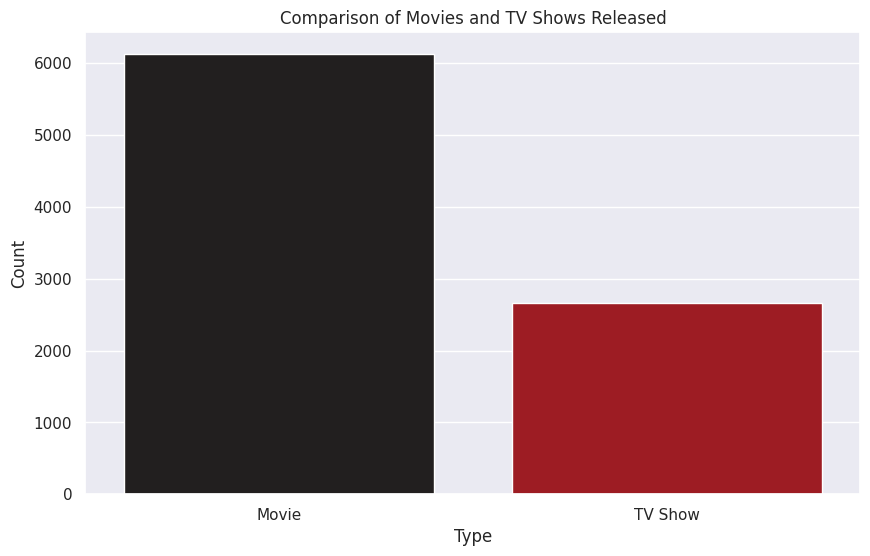

In [ ]:
#@title First Vizualization

type_counts = df['type'].value_counts()
custom_palette = ['#221f1f', '#b20710', '#e50914', '#f5f5f1'] # Netflix colors

# Plotting using seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette=custom_palette)

# Customizing the plot
plt.title('Comparison of Movies and TV Shows Released')
plt.xlabel('Type')
plt.ylabel('Count')

plt.show()

We see that there are a lot more Movies released than TV shows.

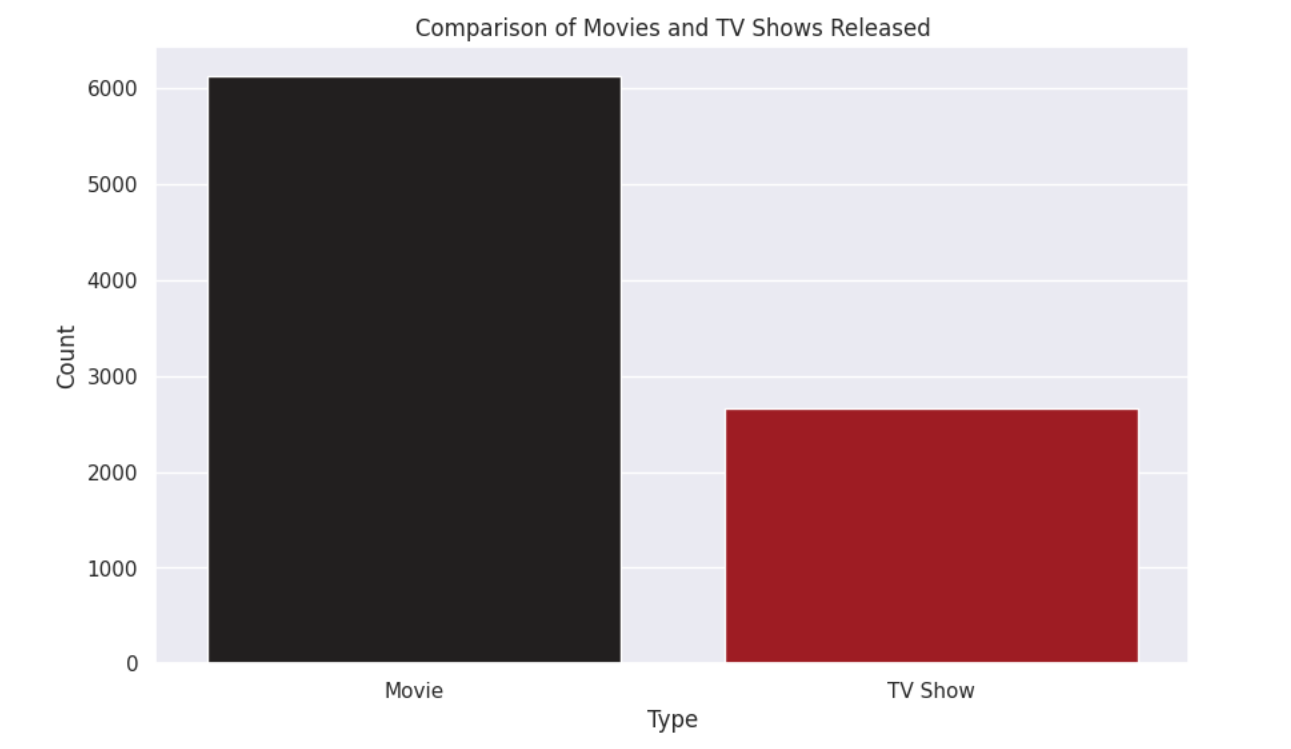

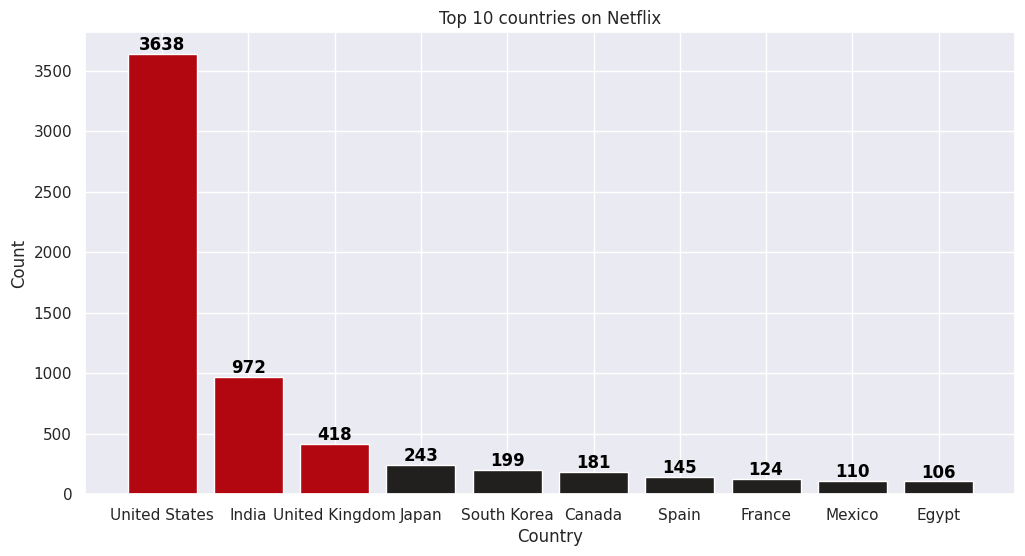

In [ ]:
#@title Second Vizualization

# Count the occurrences of each country and get the top 10
country_counts = df['country'].value_counts().nlargest(10)

# Define colors - red for the top 3 countries, grey for the rest
colors = ['#b20710' if i < 3 else '#221f1f' for i in range(10)]

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(country_counts.index, country_counts.values, color=colors)

# Adding the counts above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval)}',
             ha='center', va='bottom', color='black', weight='bold')

# Customizing the plot
plt.title('Top 10 countries on Netflix', fontsize=12)
plt.xlabel('Country')
plt.ylabel('Count')

plt.show()

Top 10 countries are showcased and we see that the USA releases a lot more content than everyone else combined.

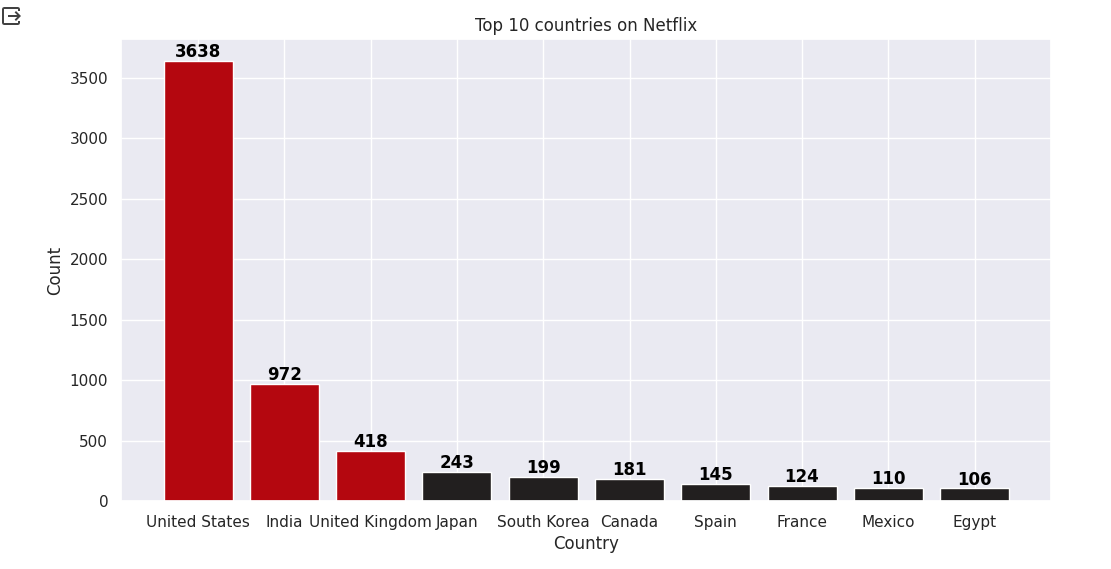

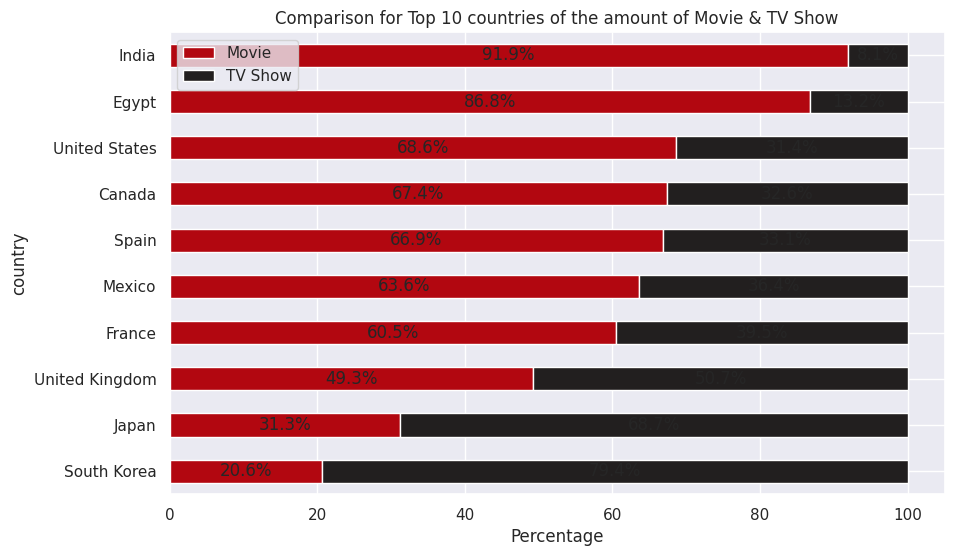

In [ ]:
#@title Third Vizualization

# Filter the DataFrame to include only the top 10 countries
top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]

# Pivot table to calculate the number of movies and TV shows per country
country_type_counts = df_top_countries.pivot_table(index='country', columns='type', aggfunc='size', fill_value=0)

# Calculate the percentage of each type
country_type_percentage = country_type_counts.div(country_type_counts.sum(axis=1), axis=0) * 100

# Sort the countries by the percentage of movies
country_type_percentage = country_type_percentage.sort_values('Movie', ascending=False)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
country_type_percentage.plot(kind='barh', stacked=True, color=['#b20710', '#221f1f'], ax=ax)

# Customize the plot
ax.set_xlabel('Percentage')
ax.set_title('Comparison for Top 10 countries of the amount of Movie & TV Show')
ax.legend(["Movie", "TV Show"])

# Annotate the percentages on the bars
for n in ax.patches:
    width, height = n.get_width(), n.get_height()
    x, y = n.get_xy()
    if width > 0:
        ax.text(x + width/2,
                y + height/2,
                '{:.1f}%'.format(width),
                horizontalalignment='center',
                verticalalignment='center')

# Invert the y-axis to have the country with the highest movie percentage at the top
ax.invert_yaxis()

plt.show()

Here we observe how much of each country's production is Movie or TV show. India has a lot more movies than TV shows; while South Korea is the opposite.

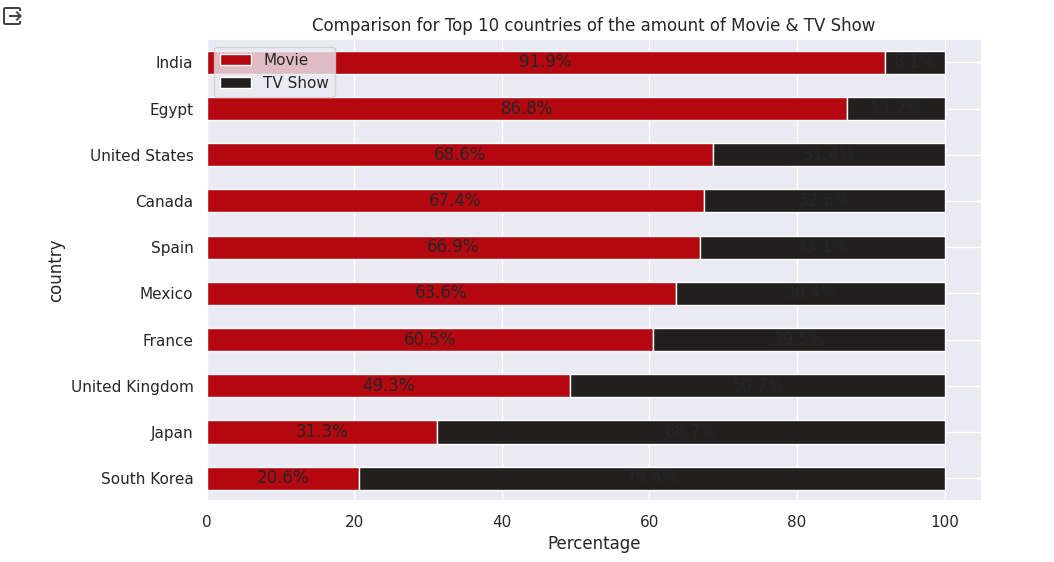

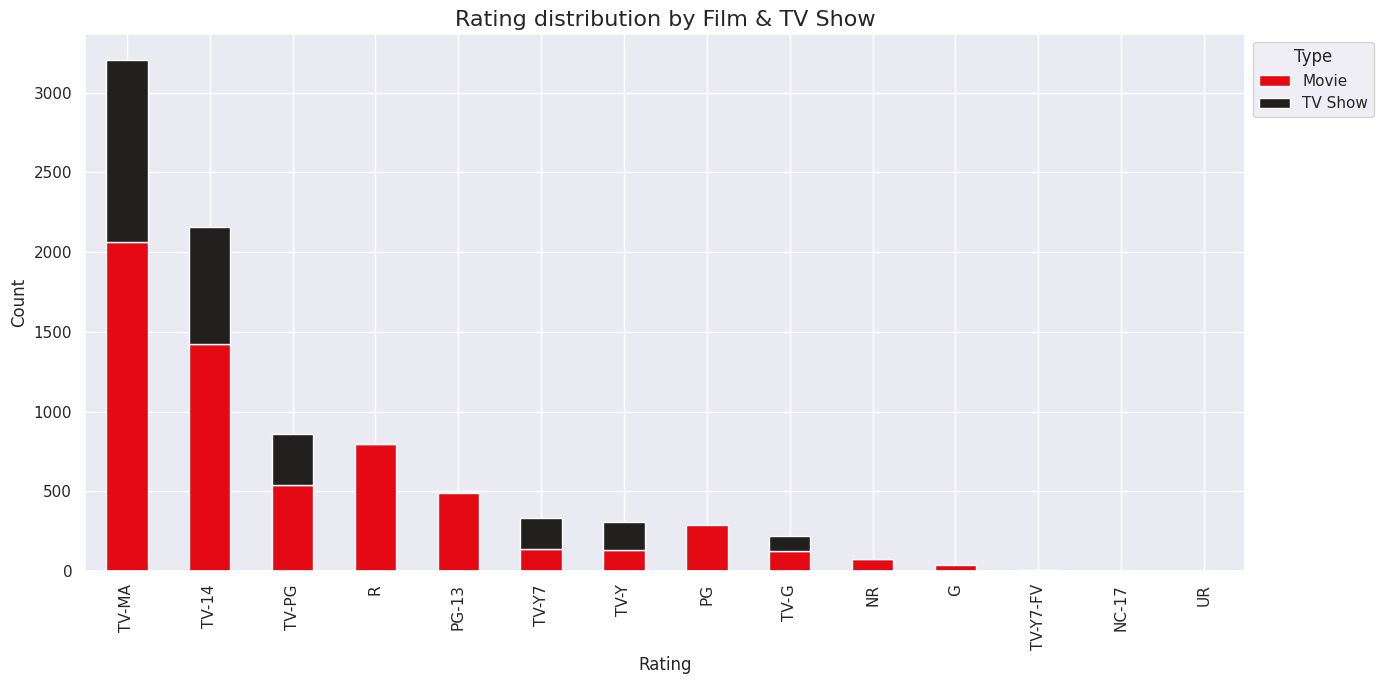

In [ ]:
#@title Fourth Vizualization

# Creating a new DataFrame to count the occurrences of each rating for Movies and TV Shows
rating_counts = df.groupby('rating')['type'].value_counts().unstack().fillna(0)

# Adding a column for the total to sort the ratings by the total number of occurrences
rating_counts['total'] = rating_counts.sum(axis=1)

# Sorting the DataFrame based on the total column
rating_counts = rating_counts.sort_values('total', ascending=False)

# Removing the total column as it's no longer needed for the plot
rating_counts = rating_counts.drop('total', axis=1)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Creating the bar plot with stacked bars for each type
rating_counts.plot(kind='bar', stacked=True, color=['#e50914', '#221f1f'], ax=ax)

# Customizing the plot
ax.set_title('Rating distribution by Film & TV Show', fontsize=16)
ax.set_ylabel('Count', fontsize=12)
ax.set_xlabel('Rating', fontsize=12)

# Move the legend out of the plot
ax.legend(title='Type', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

We can see that Movies are overwhelmingly rated TV-MA and R for example. TV shows are either rated TV-MA, TV-14, PG-13, TV-Y7, TV-Y or TV-G.

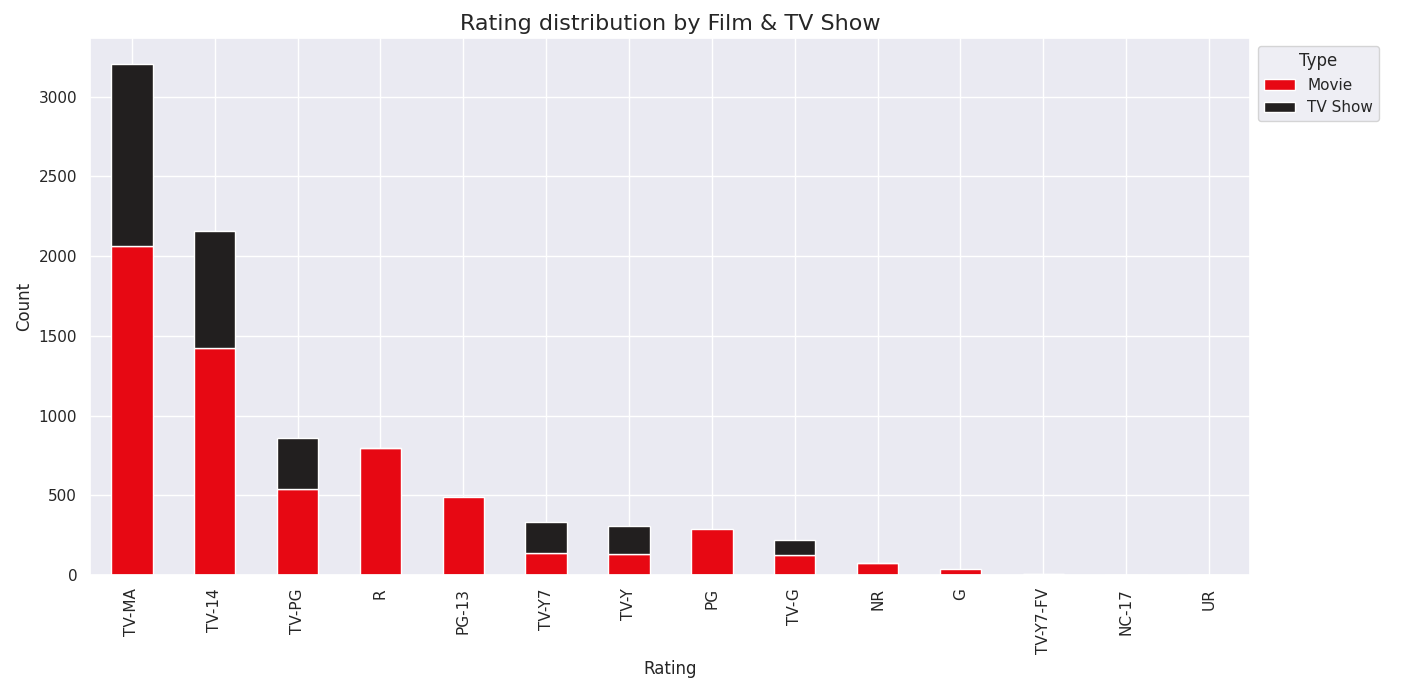

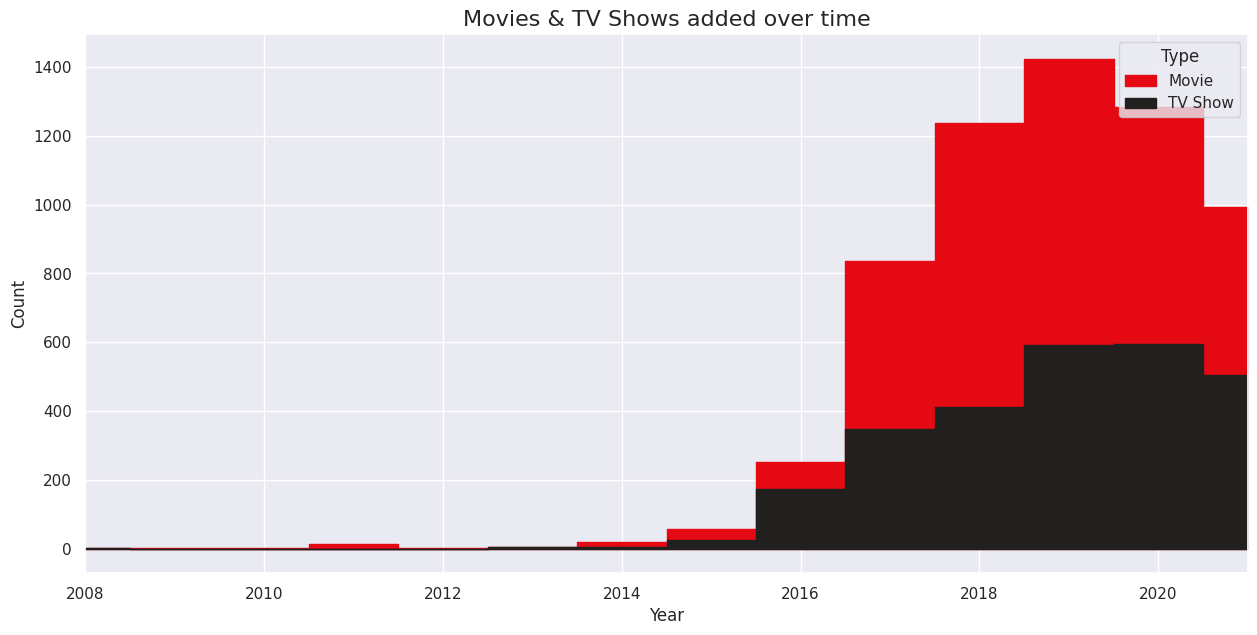

In [ ]:
#@title Fifth Vizualization

# Extracting year from 'date_added' and counting the number of Movies and TV Shows per year
df['year_added'] = df['date_added'].dt.year
type_yearly = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Filling
plt.figure(figsize=(15, 7))
plt.fill_between(type_yearly.index, type_yearly['Movie'], color='#e50914', label='Movie', step='mid')
plt.fill_between(type_yearly.index, type_yearly['TV Show'], color='#221f1f', label='TV Show', step='mid')

# Customization
plt.title('Movies & TV Shows added over time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.xlim([df['year_added'].min(), df['year_added'].max()]) # Set x-axis range to min and max years

plt.show()

The number of content released exploses from 2014 onward. It is again, mostly Movies. We see that after 2020 the amount of content released decreases, maybe because of the pandemic.

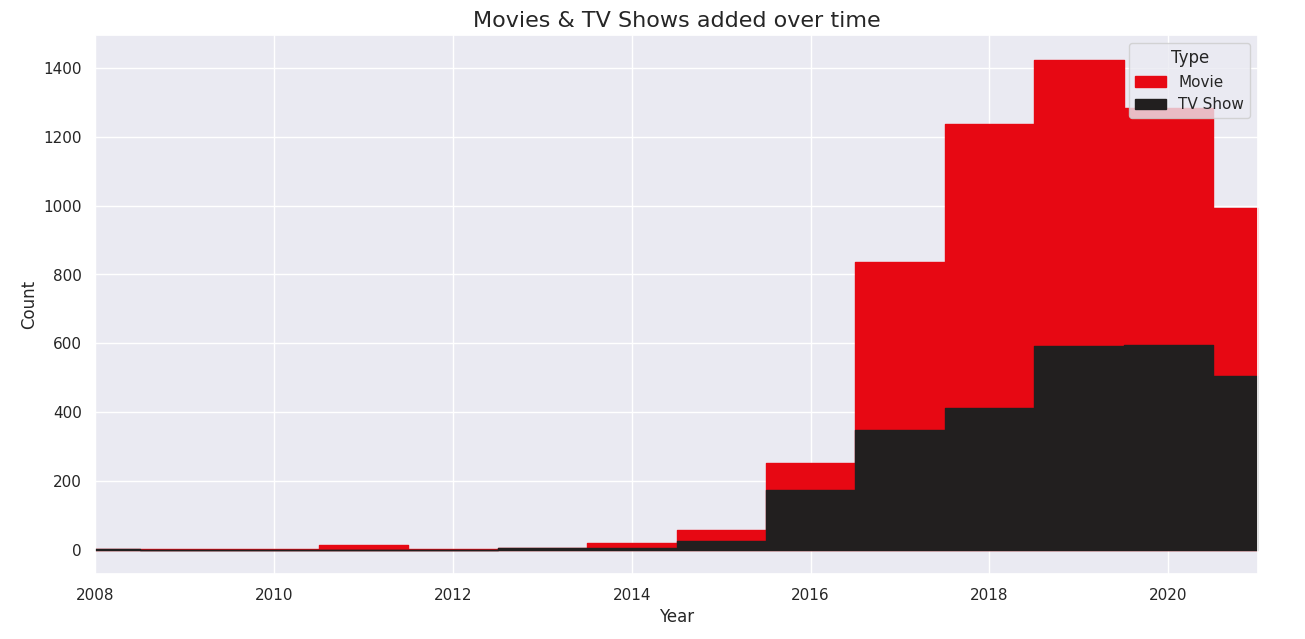

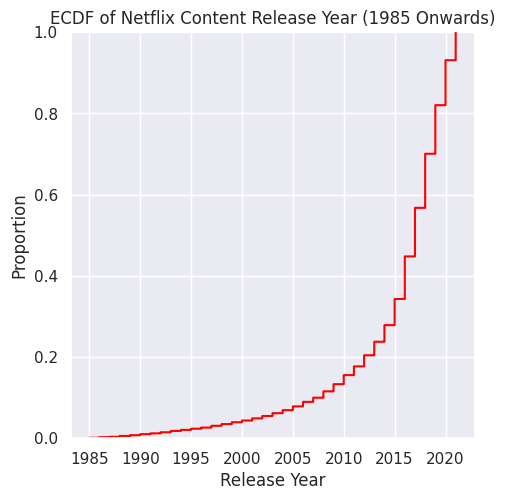

In [ ]:
#@title Sixth Vizualization

# Filter the DataFrame to include only release years from 1985 onwards
df = df.dropna(subset=['release_year'])
df_filtered = df[df['release_year'] >= 1985]

# Create an ECDF plot for the 'release_year' from 1985 onwards
sns.displot(df_filtered, x='release_year', kind='ecdf', color='red')

# Customizing the plot
plt.title('ECDF of Netflix Content Release Year (1985 Onwards)')
plt.xlabel('Release Year')
plt.ylabel('Proportion')

plt.show()

We can observe the exponantial-looking figure of content release over time.

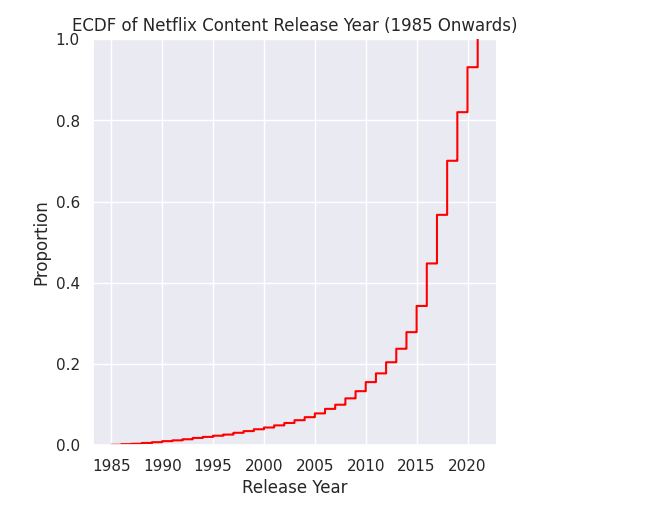

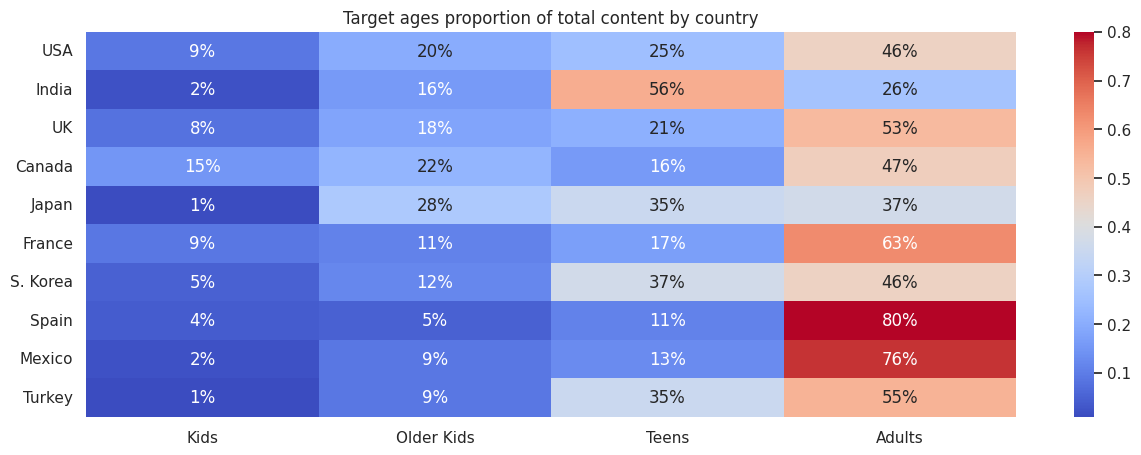

In [ ]:
#@title Seventh Vizualization

age_groups = ['Kids', 'Older Kids', 'Teens', 'Adults']
countries = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'S. Korea', 'Spain', 'Mexico', 'Turkey']
data = {
    'Kids': [0.09, 0.02, 0.08, 0.15, 0.01, 0.09, 0.05, 0.04, 0.02, 0.01],
    'Older Kids': [0.20, 0.16, 0.18, 0.22, 0.28, 0.11, 0.12, 0.05, 0.09, 0.09],
    'Teens': [0.25, 0.56, 0.21, 0.16, 0.35, 0.17, 0.37, 0.11, 0.13, 0.35],
    'Adults': [0.46, 0.26, 0.53, 0.47, 0.37, 0.63, 0.46, 0.80, 0.76, 0.55]
}

target_ages_df = pd.DataFrame(data, index=countries)

# heatmap
plt.figure(figsize=(15, 5))
sns.heatmap(target_ages_df, annot=True, fmt=".0%", cmap='coolwarm')
plt.title('Target ages proportion of total content by country')
plt.show()

Most of the content created is for adults in Spain and Mexico for Example. Oppositely, in India the target age for content production is 'teenagers' mostly. Japan is almost equivalent in proportion between Teens and Adults, which reminds us of 少年 vs 青年 categories there.

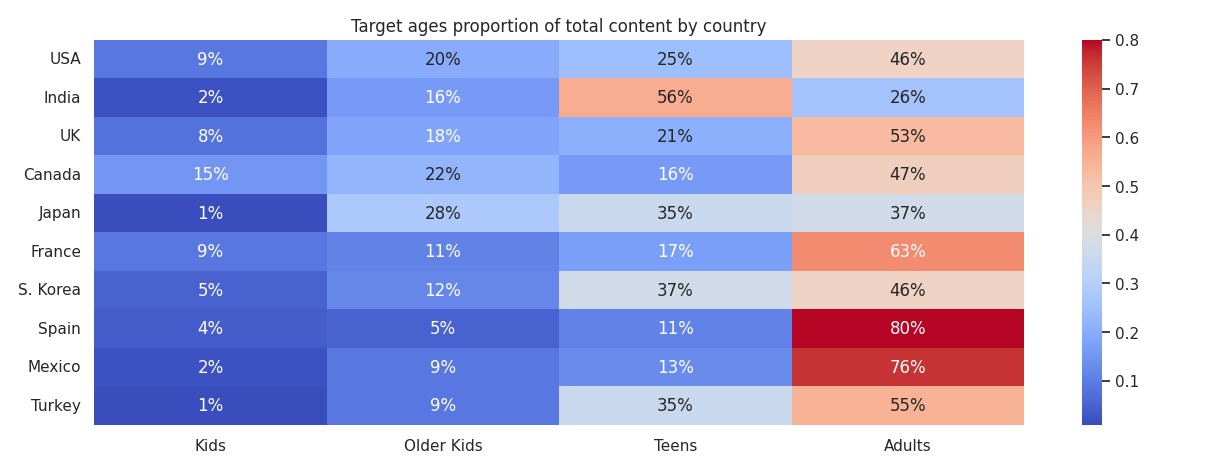

<function matplotlib.pyplot.show(close=None, block=None)>

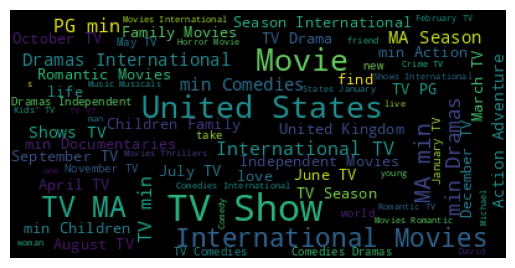

In [ ]:
#@title Eighth Vizualization

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = open("netflix_titles.csv", encoding= 'utf-8').read()
wc = WordCloud(max_font_size=30, max_words=70, background_color="black").generate(text)

plt.imshow(wc)
plt.axis("off")
plt.show

Most common words in Titles on Netflix include 'United States' and 'TV Show'.

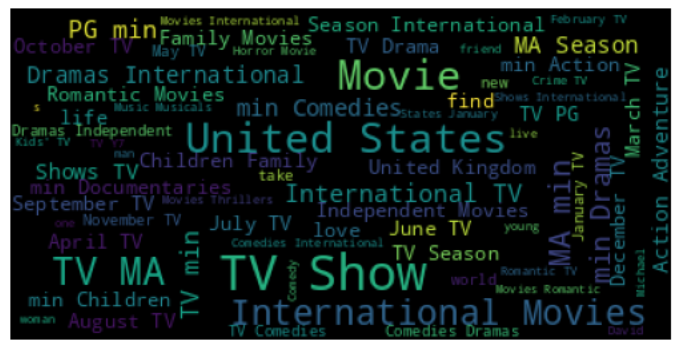